In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 타이타닉 데이터 생존자수 예측 모델 만들기
![TItanic-Survival-Infographic](https://user-images.githubusercontent.com/46340424/61845049-ab362000-aedc-11e9-9f02-e5663652c524.jpg)

In [2]:
train = pd.read_csv("./titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("./titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

# 가설 설정
## 성별에 따른 생존여부
## 좌석 계층에 따른 생존 여부
## 항구목적지에 따른 생존여부
## 가족 수에 따른 생존여부

In [5]:
#생존률에 따른 시각화를 하기 위해서 보여주었다.
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead], index = ["survived", "dead"])
    df.plot.bar(stacked = True, figsize = (10, 5))
    plt.legend(loc = (1.1, 0.5))
    plt.show()

In [6]:
train_test_data = [train, test]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
#결측치를 쉽게 확인하기 위해서 train test를 구분하는 함수를 만듬
def judge():
    for dataset in train_test_data:
        print("{}".format(dataset.isna().sum() / len(dataset)), "\n")

In [10]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64 



# Familysize 만들기

In [11]:
for dataset in train_test_data:
    dataset["Familysize"] = dataset["Parch"] + dataset["SibSp"]

In [12]:
#가족이 있냐 없냐에 따라서 구분
for dataset in train_test_data:
    dataset["IsAlone"] = dataset["Familysize"].map(lambda x : 0 if x == 0 else 1)

In [13]:
#나머지 feature삭제
for dataset in train_test_data:
    dataset.drop(["SibSp", "Parch", "Familysize"], axis = 1, inplace = True)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,1


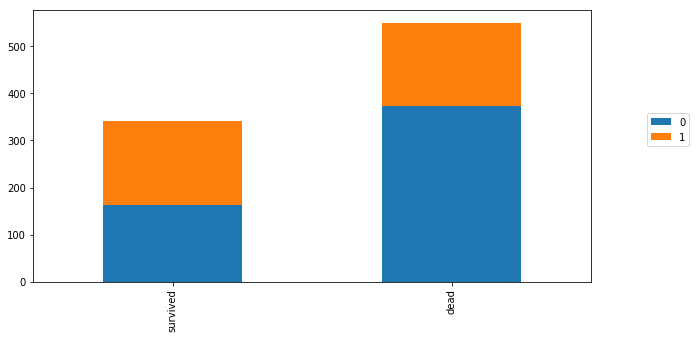

In [16]:
bar_chart("IsAlone")

In [17]:
#가족 수가 있을 수록 생존 확률이 높다.
pd.DataFrame(train.groupby("IsAlone")["Survived"].mean())

,Survived
IsAlone,
0,0.303538
1,0.505650


# Embarked 결측치 채우기

In [18]:
#결측치 구간 확인
train[train["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,113572,80.0,B28,NaN,0


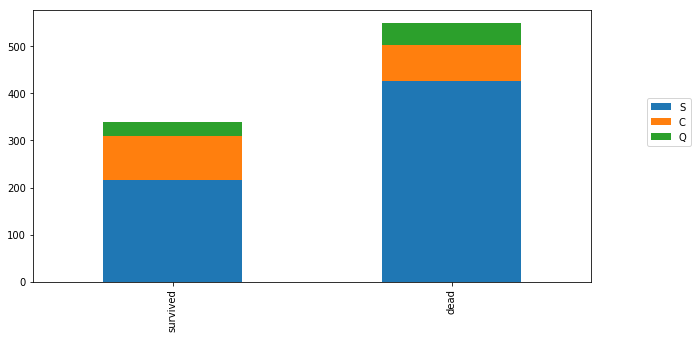

In [19]:
#어떤 값이 제일 많은지 확인
bar_chart("Embarked")

In [20]:
#많은 값을 집어넣음
train["Embarked"].fillna("S", inplace = True)

In [21]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
IsAlone        0.000000
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
IsAlone        0.000000
dtype: float64 



# Name정보 추출하기

In [22]:
#정규 표현식을 이용하여 이름의 정보를 추출하기
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,Mr


In [24]:
#crosstab을 이용하여 도수 분포표 만들기
pd.crosstab(train["Title"], train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
#사소한 것을 제외하고 나머지는 Mr, Mrs, Miss, Rare로 바꿈
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [26]:
train.groupby("Title")[["Title", "Survived"]].mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [27]:
for dataset in train_test_data:
    dataset.drop("Name", axis = 1, inplace = True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,female,35.0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,male,35.0,373450,8.0500,NaN,S,0,Mr


In [29]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
IsAlone        0.000000
Title          0.000000
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.205742
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
IsAlone        0.000000
Title          0.000000
dtype: float64 



# Cabin 정보 추출하기

In [30]:
#짐이 있냐 없냐에 따라서 생존 여부도 판단 할 수 있다고 생각했다.
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [31]:
train.Cabin.unique()

array(['99', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [32]:
for dataset in train_test_data:
    dataset["IsCabin"] = dataset["Cabin"].map(lambda x : 0 if x == "99" else 1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title,IsCabin
0,1,0,3,male,22.0,A/5 21171,7.2500,99,S,1,Mr,0
1,2,1,1,female,38.0,PC 17599,71.2833,C,C,1,Mrs,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,99,S,0,Miss,0
3,4,1,1,female,35.0,113803,53.1000,C,S,1,Mrs,1
4,5,0,3,male,35.0,373450,8.0500,99,S,0,Mr,0


In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title,IsCabin
0,1,0,3,male,22.0,A/5 21171,7.2500,99,S,1,Mr,0
1,2,1,1,female,38.0,PC 17599,71.2833,C,C,1,Mrs,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,99,S,0,Miss,0
3,4,1,1,female,35.0,113803,53.1000,C,S,1,Mrs,1
4,5,0,3,male,35.0,373450,8.0500,99,S,0,Mr,0


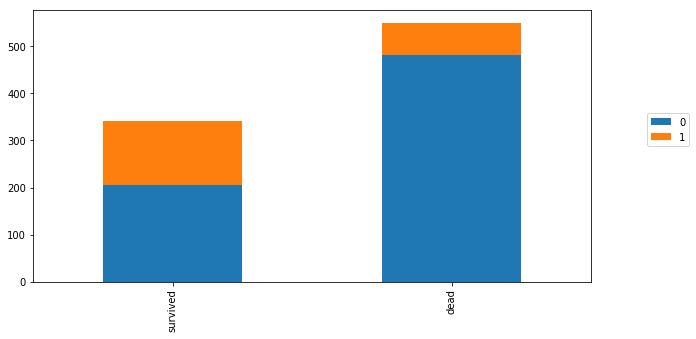

In [35]:
bar_chart("IsCabin")

In [36]:
#짐이 있을수록 생존 확률이 높다.
pd.DataFrame(train.groupby("IsCabin")["Survived"].mean())

,Survived
IsCabin,
0,0.299854
1,0.666667


# Age 결측치 처리하기

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


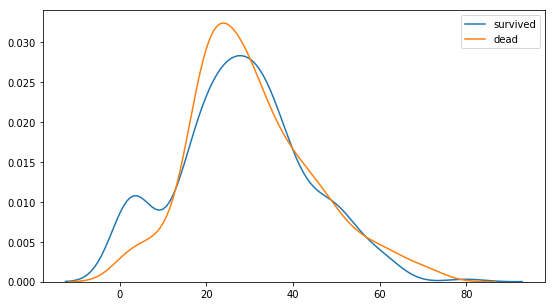

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train["Survived"] == 1]["Age"], ax = ax)
sns.kdeplot(train[train["Survived"] == 0]["Age"], ax = ax)
plt.legend(["survived", "dead"])
plt.show()

In [38]:
for dataset in train_test_data:
    age_mean = dataset["Age"].mean()
    age_std = dataset["Age"].std()
    age_nan = dataset["Age"].isna().sum()
    age_nan_list = np.random.randint(age_mean - age_std, age_mean + age_std, size = age_nan) # [-1, 1] 표준편차 사이에 난수 발생
    dataset.loc[dataset["Age"].isna(),"Age"] = age_nan_list #결측치 값에 채워넣기
    dataset['Age'] = dataset['Age'].astype(int)

In [39]:
judge()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
IsAlone        0.0
Title          0.0
IsCabin        0.0
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.000000
Embarked       0.000000
IsAlone        0.000000
Title          0.000000
IsCabin        0.000000
dtype: float64 



# test데이터의 Fare의 결측치값 처리하기

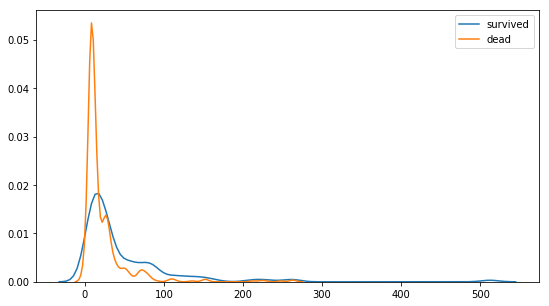

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(train[train["Survived"] == 1]["Fare"], ax = ax)
sns.kdeplot(train[train["Survived"] == 0]["Fare"], ax = ax)
plt.legend(["survived", "dead"])
plt.show()

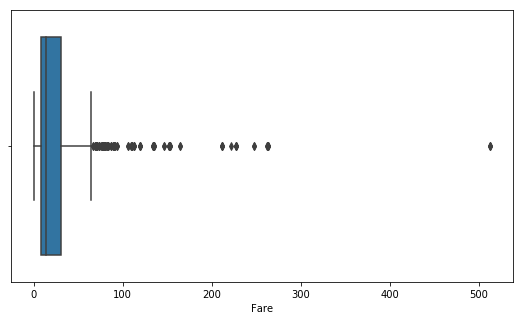

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.boxplot(train["Fare"], ax = ax)
plt.show()

In [42]:
test[test["Fare"].isna()]

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title,IsCabin
152,1044,3,male,60,3701,NaN,99,S,0,Mr,0


In [43]:
test.groupby("Pclass")["Fare"].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [44]:
#Pclass에 따라서 
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

In [45]:
judge()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
IsAlone        0.0
Title          0.0
IsCabin        0.0
dtype: float64 

PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
IsAlone        0.0
Title          0.0
IsCabin        0.0
dtype: float64 



In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title,IsCabin
0,1,0,3,male,22,A/5 21171,7.2500,99,S,1,Mr,0
1,2,1,1,female,38,PC 17599,71.2833,C,C,1,Mrs,1
2,3,1,3,female,26,STON/O2. 3101282,7.9250,99,S,0,Miss,0
3,4,1,1,female,35,113803,53.1000,C,S,1,Mrs,1
4,5,0,3,male,35,373450,8.0500,99,S,0,Mr,0


In [47]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male" : 0, "female" : 1})
    dataset["Embarked"] = dataset["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})

In [48]:
np.sort(pd.qcut(train["Fare"], 4).unique())

array([Interval(-0.001, 7.91, closed='right'),
       Interval(7.91, 14.454, closed='right'),
       Interval(14.454, 31.0, closed='right'),
       Interval(31.0, 512.329, closed='right')], dtype=object)

In [49]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31.0), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31.0, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title,IsCabin
0,1,0,3,0,22,A/5 21171,0,99,0,1,Mr,0
1,2,1,1,1,38,PC 17599,3,C,1,1,Mrs,1
2,3,1,3,1,26,STON/O2. 3101282,1,99,0,0,Miss,0
3,4,1,1,1,35,113803,3,C,0,1,Mrs,1
4,5,0,3,0,35,373450,1,99,0,0,Mr,0


In [51]:
np.sort(pd.cut(train["Age"], 5).unique())

array([Interval(-0.08, 16.0, closed='right'),
       Interval(16.0, 32.0, closed='right'),
       Interval(32.0, 48.0, closed='right'),
       Interval(48.0, 64.0, closed='right'),
       Interval(64.0, 80.0, closed='right')], dtype=object)

In [52]:
#나눈 순서에 따라서 숫자형 범주로 만듬
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <= 16.0, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16.0) & (dataset["Age"] <= 32.0), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32.0) & (dataset["Age"] <= 48.0), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48.0) & (dataset["Age"] < 64.0), "Age"] = 3
    dataset.loc[dataset["Age"] > 64.0, "Age"] = 4
    dataset["Age"] = dataset["Age"].astype(int)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title,IsCabin
0,1,0,3,0,1,A/5 21171,0,99,0,1,Mr,0
1,2,1,1,1,2,PC 17599,3,C,1,1,Mrs,1
2,3,1,3,1,1,STON/O2. 3101282,1,99,0,0,Miss,0
3,4,1,1,1,2,113803,3,C,0,1,Mrs,1
4,5,0,3,0,2,373450,1,99,0,0,Mr,0


In [54]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title,IsCabin
0,892,3,0,2,330911,0,99,2,0,Mr,0
1,893,3,1,2,363272,0,99,0,1,Mrs,0
2,894,2,0,3,240276,1,99,2,0,Mr,0
3,895,3,0,1,315154,1,99,0,0,Mr,0
4,896,3,1,1,3101298,1,99,0,1,Mrs,0


In [55]:
#이름 추출값도 숫자형 범주로 만듬
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare": 4})

In [56]:
#필요없는 변수들 삭제
for dataset in train_test_data:
    dataset.drop(["Ticket", "Cabin"], axis = 1, inplace = True)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title,IsCabin
0,1,0,3,0,1,0,0,1,0,0
1,2,1,1,1,2,3,1,1,2,1
2,3,1,3,1,1,1,0,0,1,0
3,4,1,1,1,2,3,0,1,2,1
4,5,0,3,0,2,1,0,0,0,0


In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title,IsCabin
0,892,3,0,2,0,2,0,0,0
1,893,3,1,2,0,0,1,2,0
2,894,2,0,3,1,2,0,0,0
3,895,3,0,1,1,0,0,0,0
4,896,3,1,1,1,0,1,2,0


In [59]:
for dataset in train_test_data:
    dataset["Age*Pclass"] = dataset["Age"] * dataset["Pclass"]

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title,IsCabin,Age*Pclass
0,1,0,3,0,1,0,0,1,0,0,3
1,2,1,1,1,2,3,1,1,2,1,2
2,3,1,3,1,1,1,0,0,1,0,3
3,4,1,1,1,2,3,0,1,2,1,2
4,5,0,3,0,2,1,0,0,0,0,6


In [61]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title,IsCabin,Age*Pclass
0,892,3,0,2,0,2,0,0,0,6
1,893,3,1,2,0,0,1,2,0,6
2,894,2,0,3,1,2,0,0,0,6
3,895,3,0,1,1,0,0,0,0,3
4,896,3,1,1,1,0,1,2,0,3


# model 선택하기

In [62]:
#train_test데이터를 나누어 성능 검정
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.77


In [64]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

82.74


In [65]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

77.66


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# RandomForest 도식화
![Decision tree](https://user-images.githubusercontent.com/46340424/62442553-3512a280-b793-11e9-8513-d81d0aba5dfe.png)
## 위와 같이 여러 의사결정 나무들을 만들어서 투표를 통해 다수결로 성능을 판단

In [66]:
#결과값 예측에 중요한 변수로 작동한 것이 무엇인지 알아보기 위해 도수 분포표를 만듬
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(randomforest.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,variable,importance
6,IsAlone,0.300843
1,Pclass,0.225497
0,Survived,0.117786
3,Age,0.095324
8,IsCabin,0.075985
7,Title,0.059994
4,Fare,0.053532
2,Sex,0.041311
5,Embarked,0.029729
9,Age*Pclass,NaN


In [67]:
#결과값 제출
predict = randomforest.predict(test.drop("PassengerId", axis = 1))
submission = pd.DataFrame({"PassengerId" : test["PassengerId"], "Survived" : predict})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [68]:
submission.to_csv("submission2.csv", index = False)